<a href="https://colab.research.google.com/github/Abhinavl3v3l/EVA3/blob/master/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist                                                # Importing Necessary Libraries and dataset(in keras)

In [0]:
# # example of standardizing a image dataset
# from keras.datasets import mnist
# from keras.preprocessing.image import ImageDataGenerator

# # load dataset
# (trainX, trainy), (testX, testy) = mnist.load_data()

# # reshape dataset to have a single channel
# width, height, channels = trainX.shape[1], trainX.shape[2], 1
# trainX = trainX.reshape((trainX.shape[0], width, height, channels))
# testX = testX.reshape((testX.shape[0], width, height, channels))
# print('trainX.shape',trainX.shape)
# # report pixel means and standard deviations
# print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# # create generator that centers pixel values
# datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# # calculate the mean on the training dataset
# datagen.fit(trainX)
# print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))


# # demonstrate effect on a single batch of samples
# iterator = datagen.flow(trainX, trainy, batch_size=64)

# # get a batch
# batchX, batchy = iterator.next()

# # pixel stats in the batch
# print(batchX.shape, batchX.mean(), batchX.std())
# # demonstrate effect on entire training dataset
# iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# # get a batch
# batchX, batchy = iterator.next()

# # pixel stats in the batch
# print(batchX.shape, batchX.mean(), batchX.std())


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()                        # mnist data divided into Training and Test Data
                                                                                # Where X_train are 60K 28x28 gray scale training images of numbers from [0-9] 
                                                                                # y_train are label of numbers from [0-9]

(60000, 28, 28)


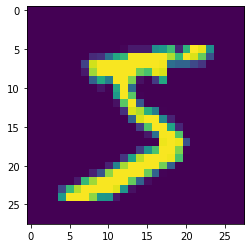

In [68]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])                                                           # Displaying what one of the images look like.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)                           # (60000, 28, 28) ->  (60000, 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Image Normalization 

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)
iterator = datagen.flow(X_train, y_train, batch_size=len(X_train), shuffle=False)
X_train, y_train = iterator.next()

In [0]:
X_train = X_train.astype('float32')                                             # Convert to float type
X_test = X_test.astype('float32') 
X_train /= 255
X_test /= 255                                                                   # Floating Value ranges from [0,1]

In [72]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)                                  
Y_test = np_utils.to_categorical(y_test, 10)

In [74]:
Y_train[:10]                                                                    ## y_train to Y_train  - example,5 value is converted to an array where 5th element of array is 1(lit) and rest all is 0 
                                                                                
                                                                                # OR 
                                                                                
                                                                                # 1 Hot Encoded  


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Assignment 5

1. Change the code 8 or your own 4th Code from Assignment 4 to include:
  - image normalization
  - L2 regularization
  - ReLU after BN
2. Run your new code for 40 epochs and save the model with highest validation accuracy
3. Find out 25 misclassified images from the validation dataset and create an image gallery
4. Submit





In [75]:
# Network 



from keras.layers import Activation
model = Sequential()
# datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
model.add(BatchNormalization())#BN before RELU
# L2 work for very large number of kernels but we don't have that here.
model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.01)))    #26
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu',kernel_regularizer=l2(0.01)))                           #24
model.add(Dropout(0.1))


model.add(Convolution2D(10, 1, 1, activation='relu',kernel_regularizer=l2(0.01)))                           #24
model.add(MaxPooling2D(pool_size=(2, 2)))                                       #12

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=l2(0.01)))                           #10

model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=l2(0.01)))                           #8
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=l2(0.01)))                           #6
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=l2(0.01)))                           #4
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4))


model.add(Flatten())
model.add(Activation('softmax'))
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-p

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 13s 216us/step - loss: 0.3042 - acc: 0.9233 - val_loss: 9.4556 - val_acc: 0.3907
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 176us/step - loss: 0.0909 - acc: 0.9771 - val_loss: 6.8241 - val_acc: 0.5584
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 178us/step - loss: 0.0706 - acc: 0.9815 - val_loss: 8.2184 - val_acc: 0.4632
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 11s 177us/step - loss: 0.0604 - acc: 0.9844 - val_loss: 5.0834 - val_acc: 0.6711
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
# from keras.optimizers import Adam
# from keras.callbacks import LearningRateScheduler
# def scheduler(epoch, lr):
#   return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)                               # Evaluate the Model over test data

In [78]:
print(score)                                                                    # Accuracy over test data.

[5.154633296203613, 0.6591]


In [0]:
y_pred = model.predict(X_test)                                                  # predicting the values with validation accuracy

In [80]:
print(y_pred[:9])                                                               
print(y_test[:9])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0962291e-24 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 5.1208522e-13 1.3925425e-37 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.0990440e-22 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.1339673e-10]
 [0.0000000e+00 1.0000000e+00 1.2370227e-15 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 5.4315282e-34 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 1.1072749e-15 0.0000000e+00 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [82]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored